<a href="https://colab.research.google.com/github/olsem1/WP-3/blob/master/KFold_%22RF%2BXGBoost%2Bneer_cpi_2002_2019%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [11]:
course = pd.read_excel('RC_2002-2020.xlsx')
course = course.rename(columns={"data": "date"})
course = course.set_index('date')
course_m = course.resample('MS').mean()

# **Переменные**

In [12]:
cpi = "month"
reg_names = ['RF']
data_do = "2019-12-01"
train_do = "2019-01-01"

In [13]:
data = pd.read_excel('cpi_reg.xls', sheet_name = cpi)
data = data.set_index('date')
data = data.interpolate(method='polynomial', order=2, axis=0)
data.isna().sum().sum()

0

In [14]:
data.min().min()

91.17

In [15]:
data.tail(12)

,RF,BEL,BRY,VLA,VOR,IVA,KAL,KOS,KUR,LIP,MOS,ORL,RYA,SMO,TAM,TVE,TUL,YAR,MOW,KAR,KOM,ARK,VLG,KAG,LEN,MUR,NGR,PSK,SPB,ADY,KLM,KRA,AST,VGG,ROS,DAG,ING,KAB,KAO,NOR,STA,BAS,MAR,MOR,TAT,UDM,CHV,PER,KIR,NIZ,ORE,PNZ,SAM,SAR,ULY,KUG,SVE,TYU,CHE,ALI,TUV,KHK,ALT,KYA,IRK,KEM,NVS,OMS,TOM,BUR,SAH,ZAB,KAM,PRI,KHA,AMU,MAG,SAK,JEW,CHU
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-01,100.13,100.06,100.50,100.26,100.21,99.97,100.03,100.20,100.03,100.27,100.04,100.39,100.33,100.12,100.23,100.17,100.05,100.21,100.06,100.08,99.48,100.08,100.51,100.34,100.06,100.29,100.06,100.21,100.12,99.97,100.14,99.88,100.05,100.25,100.03,100.72,100.43,100.30,100.38,100.00,100.20,100.47,100.23,100.02,100.11,100.19,100.27,99.97,100.07,100.24,100.15,100.13,100.27,100.13,100.01,100.27,100.12,99.81,99.99,100.20,100.40,100.15,100.19,100.15,100.37,100.28,100.37,100.19,100.31,100.16,99.99,100.52,100.24,100.28,99.92,100.28,100.11,100.25,100.11,100.09
2019-11-01,100.28,100.12,100.29,100.23,100.41,100.37,100.53,100.48,100.16,100.32,100.26,100.38,100.45,100.41,100.14,100.20,100.45,100.58,100.28,100.23,100.34,100.31,100.20,100.21,100.41,100.24,100.21,99.96,100.17,100.15,100.69,100.25,100.14,100.31,100.21,100.75,100.37,100.39,100.56,100.88,100.41,100.01,100.25,100.19,100.26,100.20,100.11,100.34,100.19,100.32,100.21,100.16,100.38,100.43,100.07,100.28,100.27,100.46,100.36,100.25,100.23,100.40,100.27,100.27,100.10,100.26,100.15,100.16,100.43,100.52,100.06,100.13,100.10,100.19,100.48,100.34,100.25,100.64,100.35,100.26
2019-12-01,100.36,100.23,100.53,100.18,100.20,100.48,100.47,100.44,100.40,100.23,100.30,100.31,100.25,100.24,100.41,100.52,100.39,100.12,100.33,100.57,100.70,100.50,100.34,100.38,100.28,100.50,100.31,100.23,100.37,100.55,100.60,100.25,100.35,100.35,100.42,100.56,100.37,100.41,100.46,100.40,100.29,100.23,100.33,100.39,100.32,100.42,100.15,100.56,100.55,100.16,100.24,100.27,100.23,100.62,100.54,100.29,100.47,100.60,100.43,100.46,100.41,100.34,100.26,100.52,100.54,100.26,100.31,100.56,100.31,100.19,100.44,100.21,100.21,100.29,100.28,100.54,100.45,100.40,100.28,100.13
2020-01-01,100.40,100.53,100.28,100.76,100.74,100.48,100.12,100.32,100.51,100.53,100.25,100.16,100.40,100.38,100.26,100.25,100.59,100.59,100.42,100.51,101.86,100.64,100.41,100.60,100.29,100.28,100.76,100.49,100.71,100.83,100.41,100.37,100.42,100.58,100.32,100.35,100.52,100.50,100.75,100.50,100.57,100.34,100.21,100.12,100.29,100.36,100.41,100.28,100.18,100.66,100.16,100.45,100.43,100.78,100.21,100.35,100.07,100.09,100.43,100.25,100.36,100.16,100.56,100.24,100.24,100.13,100.26,100.11,100.47,100.87,99.80,100.62,100.38,100.48,100.54,100.73,99.55,100.48,100.50,100.10
2020-02-01,100.33,100.19,100.29,100.29,100.31,100.42,100.63,100.45,100.27,100.21,100.32,100.47,100.23,100.26,100.14,100.29,100.40,100.65,100.22,100.57,100.81,100.40,100.39,100.25,100.26,100.46,100.37,100.22,100.15,100.11,99.79,100.33,100.02,100.23,100.26,100.20,100.13,100.40,100.28,100.14,100.50,100.39,100.50,100.27,100.42,100.21,100.20,100.46,100.35,100.01,100.06,100.26,100.48,100.74,100.50,100.41,100.22,100.49,100.15,100.41,100.34,100.38,100.46,100.63,100.52,100.61,100.38,100.54,100.46,100.34,100.52,100.42,100.13,100.54,100.55,100.38,100.62,100.33,100.63,100.58
2020-03-01,100.55,100.61,100.74,100.82,100.85,100.90,100.59,100.44,100.64,100.53,100.37,100.44,100.62,100.82,100.66,100.83,101.30,100.64,100.33,100.60,100.16,100.42,100.75,100.72,100.49,100.45,100.75,100.54,100.79,100.28,100.64,100.65,100.69,100.58,100.61,101.75,100.44,100.67,100.82,100.58,100.47,100.80,100.46,100.69,100.35,100.47,100.32,100.34,100.73,100.98,100.61,100.78,100.58,100.86,100.63,100.61,100.41,100.49,100.50,100.07,100.65,100.58,100.48,100.24,100.16,100.73,100.89,100.25,100.30,100.46,100.06,100.73,100.16,99.96,100.03,100.50,100.76,100.40,100.45,100.59
2020-04-01,100.83,100.95,100.80,100.91,101.06,100.88,101.34,100.69,101.32,101.04,100.65,101.10,101.30,101.40,101.29,101.22,101.07,100.50,100.44,100.85,100.80,100.95,100.83,100.86,100.

In [16]:
data = data[reg_names]
data = data[:data_do]
data_course = data.merge(course_m, left_on='date', right_on='date')
data_course.tail()
data=data_course

In [17]:
train_data = data[data.index < train_do]
test_data = data[data.index >= train_do]

In [ ]:
data


,RF,curs
date,,
2002-01-01,103.09,30.472715
2002-02-01,101.16,30.805700
2002-03-01,101.08,31.064267
2002-04-01,101.16,31.173586
2002-05-01,101.69,31.254884
...,...,...
2019-08-01,99.76,65.587483
2019-09-01,99.84,64.958705
2019-10-01,100.13,64.374991


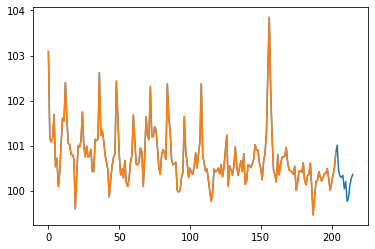

In [ ]:
plt.plot(data[reg_names].values)
plt.plot(train_data[reg_names].values)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data

,RF,curs
date,,
2002-01-01,103.09,30.472715
2002-02-01,101.16,30.805700
2002-03-01,101.08,31.064267
2002-04-01,101.16,31.173586
2002-05-01,101.69,31.254884
...,...,...
2019-08-01,99.76,65.587483
2019-09-01,99.84,64.958705
2019-10-01,100.13,64.374991


In [ ]:
data_lags = pd.DataFrame()

data_lags['curs-1'] = data['curs'].shift(1).values
data_lags['curs'] = data['curs'].values
data_lags['t'] = data[reg_names].values
for i in range(1, 13):
    data_lags['t-'+str(i)] = data[reg_names].shift(i).values
    
data_lags.index = data.index
data_lags = data_lags[12:]
data_lags['month'] = pd.DatetimeIndex(data_lags.index).month

In [ ]:
#course_lags = pd.DataFrame()
#for i in range(1, 13):
#    course_lags['curs-'+str(i)] = data["curs"].shift(i).values
#course_lags.index = data.index
#course_lags = course_lags[12:]

In [ ]:
#course_lags.head()

In [ ]:
#data_lags = data_lags.merge(course_lags, left_on='date', right_on='date')

In [ ]:
data_lags.head(5)

,curs-1,curs,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,month
date,,,,,,,,,,,,,,,,
2003-01-01,31.836840,31.816165,102.40,101.54,101.61,101.07,100.40,100.09,100.72,100.53,101.69,101.16,101.08,101.16,103.09,1
2003-02-01,31.816165,31.698979,101.63,102.40,101.54,101.61,101.07,100.40,100.09,100.72,100.53,101.69,101.16,101.08,101.16,2
2003-03-01,31.698979,31.453290,101.05,101.63,102.40,101.54,101.61,101.07,100.40,100.09,100.72,100.53,101.69,101.16,101.08,3
2003-04-01,31.453290,31.211786,101.02,101.05,101.63,102.40,101.54,101.61,101.07,100.40,100.09,100.72,100.53,101.69,101.16,4
2003-05-01,31.211786,30.907055,100.80,101.02,101.05,101.63,102.40,101.54,101.61,101.07,100.40,100.09,100.72,100.53,101.69,5


In [ ]:
df = data_lags.copy()
#df['month'] = pd.DatetimeIndex(df.index).month

In [ ]:
df.tail(12)

,curs-1,curs,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,month
date,,,,,,,,,,,,,,,,
2019-01-01,67.335314,66.512544,101.01,100.84,100.50,100.35,100.16,100.01,100.27,100.49,100.38,100.38,100.29,100.21,100.31,1
2019-02-01,66.512544,65.810525,100.44,101.01,100.84,100.50,100.35,100.16,100.01,100.27,100.49,100.38,100.38,100.29,100.21,2
2019-03-01,65.810525,65.092257,100.32,100.44,101.01,100.84,100.50,100.35,100.16,100.01,100.27,100.49,100.38,100.38,100.29,3
2019-04-01,65.092257,64.603105,100.29,100.32,100.44,101.01,100.84,100.50,100.35,100.16,100.01,100.27,100.49,100.38,100.38,4
2019-05-01,64.603105,64.818706,100.34,100.29,100.32,100.44,101.01,100.84,100.50,100.35,100.16,100.01,100.27,100.49,100.38,5
2019-06-01,64.818706,64.169050,100.04,100.34,100.29,100.32,100.44,101.01,100.84,100.50,100.35,100.16,100.01,100.27,100.49,6
2019-07-01,64.169050,63.222682,100.20,100.04,100.34,100.29,100.32,100.44,101.01,100.84,100.50,100.35,100.16,100.01,100.27,7
2019-08-01,63.222682,65.587483,99.76,100.20,100.04,100.34,100.29,100.32,100.44,101.01,100.84,100.50,100.35,100.16,100.01,8
2019-09-01,65.587483,64.958705,99.84,99.76,100.20,100.04,100.34,100.29,100.32,100.44,101.01,100.84,100.50,100.35,100.16,9


In [ ]:
train = df[df.index < '2019-01-01']
test = df[df.index >= '2019-01-01']

#X_train = train[['month'] + ['curs'] + ['t-{}'.format(month) for month in range(1,13)] + ['curs-{}'.format(month) for month in range(1,12)]].values
X_train = train[['month'] + ['curs'] + ['t-{}'.format(month) for month in range(1,13)]].values
y_train = train[['t']].values.ravel()

In [ ]:
%%time
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=1)
model.fit(X_train, y_train)

CPU times: user 91 ms, sys: 0 ns, total: 91 ms
Wall time: 91.8 ms


In [ ]:
#X_test = test[['month'] + ['curs'] + ['curs-{}'.format(month) for month in range(1,12)] + ['t-{}'.format(month) for month in range(1,13)]].values
X_test = test[['month'] + ['curs'] + ['curs-1'] + ['t-{}'.format(month) for month in range(1,12)]].values
y_test = test[['t']].values.ravel()

In [ ]:
[['month'] + ['curs'] + ['curs-1'] + ['t-{}'.format(month) for month in range(1,13)]]

[['month',
  'curs',
  'curs-1',
  't-1',
  't-2',
  't-3',
  't-4',
  't-5',
  't-6',
  't-7',
  't-8',
  't-9',
  't-10',
  't-11',
  't-12']]

In [ ]:
forecast = model.predict(X_test)

In [ ]:
model.feature_importances_

array([0.19270961, 0.04368385, 0.46999856, 0.01562988, 0.00808367,
       0.01250167, 0.02051499, 0.01020147, 0.02150408, 0.01451188,
       0.04272717, 0.01812241, 0.03050794, 0.09930281])

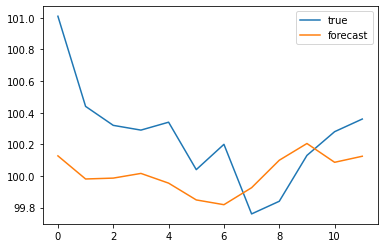

In [ ]:
plt.plot(y_test, label='true')
plt.plot(forecast, label='forecast')
plt.legend()

In [ ]:
print('rmse: {:.4f}'.format(mean_squared_error(y_test, forecast) ** 0.5))
print('normed rmse: {:.4f}%'.format(mean_squared_error(y_test, forecast) ** 0.5 / np.mean(y_test) * 100))

rmse: 0.3765
normed rmse: 0.3755%


# **Slide test**

In [ ]:
slide_test = test[test.index == '2019-01-01'][['month'] + ['curs'] + ['curs-1'] + ['t-{}'.
                                            format(month) for month in range(1,12)]].values
#print(slide_test)

forecast = []
forecast.append(model.predict(slide_test)[0])

for i in range(11):
  
  slide_test_next = slide_test.copy()
  slide_test_next[0, 1] = forecast[-1]

  slide_test_next[0, 0] += 1
  slide_test_next[0, 2:] = slide_test[0, 1:-1]
  
  print(slide_test_next)
  slide_test = slide_test_next.copy()

  forecast.append(model.predict(slide_test)[0])

forecast = np.array(forecast)

[[  1.          66.51254375  67.33531364 100.84       100.5
  100.35       100.16       100.01       100.27       100.49
  100.38       100.38       100.29       100.21      ]]
[[  2.         100.12699754  66.51254375  67.33531364 100.84
  100.5        100.35       100.16       100.01       100.27
  100.49       100.38       100.38       100.29      ]]
[[  3.         100.00717377 100.12699754  66.51254375  67.33531364
  100.84       100.5        100.35       100.16       100.01
  100.27       100.49       100.38       100.38      ]]
[[  4.         100.35306925 100.00717377 100.12699754  66.51254375
   67.33531364 100.84       100.5        100.35       100.16
  100.01       100.27       100.49       100.38      ]]
[[  5.          99.9999996  100.35306925 100.00717377 100.12699754
   66.51254375  67.33531364 100.84       100.5        100.35
  100.16       100.01       100.27       100.49      ]]
[[  6.         100.46389333  99.9999996  100.35306925 100.00717377
  100.12699754  66.5125437

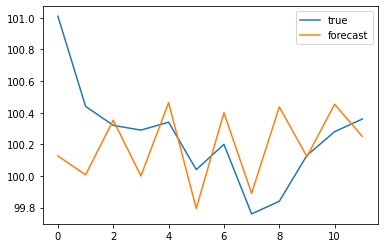

In [ ]:
plt.plot(y_test, label='true')
plt.plot(forecast, label='forecast')
plt.legend()

In [ ]:
y_test.shape

(12,)

In [ ]:
print('rmse: {:.4f}'.format(mean_squared_error(y_test, forecast) ** 0.5))
print('normed rmse: {:.4f}%'.format((mean_squared_error(y_test, forecast) ** 0.5) / np.mean(y_test) * 100))

rmse: 0.3632
normed rmse: 0.3622%


# **KFold cross validation**

In [ ]:
#!pip install mglearn -q
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import mglearn


In [ ]:
%%time
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=1)
#model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=18)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.75231786  0.28656564  0.793014    0.68088778  0.6248957   0.34404087
  0.41976411  0.5546579   0.59339139 -1.39516319 -1.06773112 -0.49604937
 -0.48894466  0.37282206 -7.70395664 -0.36051359 -0.75913552 -0.01996642]
CPU times: user 1.75 s, sys: 6.86 ms, total: 1.75 s
Wall time: 1.78 s


In [ ]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: -0.38


# **Stratified K-Fold cross-validation and other strategies**

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

In [ ]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(model, X_train, y_train, cv=kfold)))

Cross-validation scores:
[0.50936696 0.27489509 0.41966097]


In [ ]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
print("Cross-validation scores:\n{}".format(
    cross_val_score(model, X_train, y_train, cv=kfold)))

Cross-validation scores:
[0.50001589 0.63632115 0.52135481]


# **GradientBoostingRegressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
%%time
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_train, y_train)], verbose=False)

[03:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 830 ms, sys: 27 ms, total: 857 ms
Wall time: 975 ms


In [ ]:
# make predictions
xgb_forecast = xgb_model.predict(X_test)

In [ ]:
xgb_model.feature_importances_

array([0.31881148, 0.04166211, 0.19852424, 0.02328142, 0.03589753,
       0.02537155, 0.02686704, 0.02650805, 0.07238238, 0.03375017,
       0.06011055, 0.04735634, 0.05307289, 0.03640426], dtype=float32)

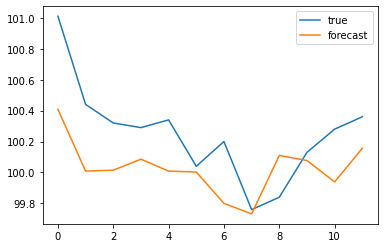

In [ ]:
plt.plot(y_test, label='true')
plt.plot(xgb_forecast, label='forecast')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
print('rmse: {:.4f}'.format(mean_squared_error(y_test, xgb_forecast) ** 0.5))
print('normed rmse: {:.4f}%'.format((mean_squared_error(y_test, xgb_forecast) ** 0.5) / np.mean(y_test) * 100))

rmse: 0.3146
normed rmse: 0.3138%
